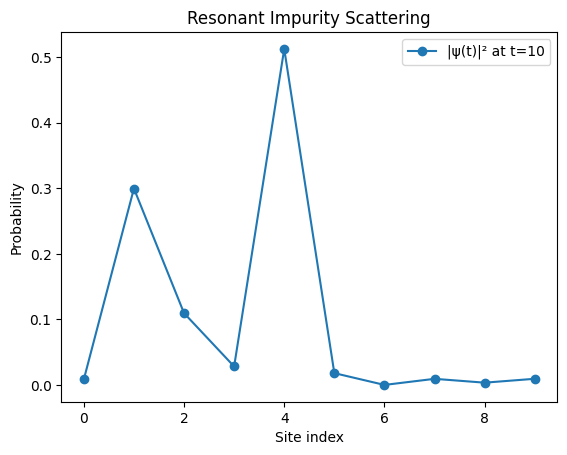

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Parameters
N = 10  # Number of lattice sites
t = 1.0  # Hopping amplitude
V = 5.0  # Impurity potential
j0 = N // 2  # Impurity position at the center

# Create the Hamiltonian
H = np.zeros((N, N), dtype=complex)
for i in range(N - 1):
    H[i, i + 1] = -t
    H[i + 1, i] = -t
H[j0, j0] = V  # Add impurity potential

# Initial state: a localized wave packet at site 0
psi0 = np.zeros(N, dtype=complex)
psi0[0] = 1.0  # Start at site 0

# Time evolution
def time_evolve(H, psi0, times):
    evolved_states = []
    for t in times:
        U = la.expm(-1j * H * t)  # Compute U(t) = exp(-iHt)
        evolved_states.append(U @ psi0)
    return evolved_states

# Simulate time evolution
times = np.linspace(0, 10, 100)
evolved_states = time_evolve(H, psi0, times)

# Plot the probability distribution at the final time
plt.plot(np.abs(evolved_states[-1])**2, 'o-', label='|ψ(t)|² at t=10')
plt.xlabel('Site index')
plt.ylabel('Probability')
plt.title('Resonant Impurity Scattering')
plt.legend()
plt.show()


In [3]:
import pennylane as qml
from pennylane import numpy as np

N = 5  # Number of sites (qubits)
t = 1.0  # Hopping amplitude
V = 5.0  # Impurity potential at site 2

# Define the Pauli terms for the spin Hamiltonian
coeffs = [-t, -t, V/2]
obs = [
    qml.PauliX(0) @ qml.PauliX(1) + qml.PauliY(0) @ qml.PauliY(1),
    qml.PauliX(1) @ qml.PauliX(2) + qml.PauliY(1) @ qml.PauliY(2),
    qml.Identity(2) - qml.PauliZ(2)
]
H = qml.Hamiltonian(coeffs, obs)

# Define the quantum device
dev = qml.device("default.qubit", wires=N)

@qml.qnode(dev)
def evolve(state, time):
    """Evolve the state under the Hamiltonian for a given time."""
    qml.QubitStateVector(state, wires=range(N))
    qml.ApproxTimeEvolution(H, time, 10)  # Trotterized time evolution
    return qml.probs(wires=range(N))

# Initial state: localized at site 0
initial_state = np.zeros(2**N)
initial_state[0] = 1  # Localized state at |000...0>

# Time evolution
times = np.linspace(0, 10, 100)
results = [evolve(initial_state, t) for t in times]

# Plot the probability distribution over time
import matplotlib.pyplot as plt
plt.imshow(np.array(results).T, aspect='auto', cmap='hot')
plt.colorbar(label='Probability')
plt.xlabel('Time step')
plt.ylabel('Site index')
plt.title('Time Evolution of Wave Packet')
plt.show()


AttributeError: module 'pennylane' has no attribute 'QubitStateVector'